# Microsoft Market Analysis Phase one Project

## Overview

This project aims to describe to Microsoft what specific information is necessary to make a informed decision regarding the future direction of their movie studio.  Exploratory data analysis shows a correlation between the ratings of certain movie genres and the box office earnings.  Microsoft can use this information to choose which specific genres to target for their early marketing descisions. 

## Business Problem

Microsoft is interested in creating their own movie studio and entering the movie market.  They are interested in knowing based on market trends of the last ten years which movies make the most at the box office and get the highest ratings.  This information will help them make an informed decision for their future marketing plans.

## Data Understanding

IMDb has a large repository of movie data tha includes information on genres, movie titles, and ratings. Included in these databases is a set of data from Box Office Mojo, a subsidiary of IMDb, that contains the foreign and domestic earnings by title and the specific movie's release year.  All of this data is data is available online and is updated daily.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
# Set all of the datafiles to a variable for easier use when making merges and running necessary code
imdbTitleBasicsdf = pd.read_csv('data/imdbTitleBasics.csv')
imdbTitleRatingsdf = pd.read_csv('data/imdbTitleRatings.csv')
bomMovieGrossdf = pd.read_csv('data/bomMovieGross.csv')

In [65]:
imdbTitleBasicsdf.info

<bound method DataFrame.info of         Unnamed: 0     tconst                                primary_title  \
0                0  tt0063540                                    Sunghursh   
1                1  tt0066787              One Day Before the Rainy Season   
2                2  tt0069049                   The Other Side of the Wind   
3                3  tt0069204                              Sabse Bada Sukh   
4                4  tt0100275                     The Wandering Soap Opera   
...            ...        ...                                          ...   
146139      146139  tt9916538                          Kuambil Lagi Hatiku   
146140      146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141      146141  tt9916706                              Dankyavar Danka   
146142      146142  tt9916730                                       6 Gunn   
146143      146143  tt9916754               Chico Albuquerque - Revelações   

                               

In [66]:
imdbTitleRatingsdf.info

<bound method DataFrame.info of        Unnamed: 0      tconst  averagerating  numvotes
0               0  tt10356526            8.3        31
1               1  tt10384606            8.9       559
2               2   tt1042974            6.4        20
3               3   tt1043726            4.2     50352
4               4   tt1060240            6.5        21
...           ...         ...            ...       ...
73851       73851   tt9805820            8.1        25
73852       73852   tt9844256            7.5        24
73853       73853   tt9851050            4.7        14
73854       73854   tt9886934            7.0         5
73855       73855   tt9894098            6.3       128

[73856 rows x 4 columns]>

In [69]:
bomMovieGrossdf.info

<bound method DataFrame.info of       Unnamed: 0                                        title      studio  \
0              0                                  Toy Story 3          BV   
1              1                   Alice in Wonderland (2010)          BV   
2              2  Harry Potter and the Deathly Hallows Part 1          WB   
3              3                                    Inception          WB   
4              4                          Shrek Forever After        P/DW   
...          ...                                          ...         ...   
3382        3382                                    The Quake       Magn.   
3383        3383                  Edward II (2018 re-release)          FM   
3384        3384                                     El Pacto        Sony   
3385        3385                                     The Swan  Synergetic   
3386        3386                            An Actor Prepares       Grav.   

      domestic_gross foreign_gross  year  


## IMDb Data

The IMDb Title Basics data contains movie data for over 146,00 films released within the last ten years including genre and movie title.

In [70]:
imdbTitleBasicsdf

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


IMDb Title Ratings contains ratings by movie and the number of votes for nearly 74,000 films

In [71]:
imdbTitleRatingsdf

,Unnamed: 0,tconst,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21
...,...,...,...,...
73851,73851,tt9805820,8.1,25
73852,73852,tt9844256,7.5,24
73853,73853,tt9851050,4.7,14
73854,73854,tt9886934,7.0,5


bomMovieGross contains the title, domestic gross earnings, and foreign Gross earnings of nearly 3400 movies as well as their release year.

In [72]:
bomMovieGrossdf

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...
3382,3382,The Quake,Magn.,6200.0,NaN,2018
3383,3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,3384,El Pacto,Sony,2500.0,NaN,2018
3385,3385,The Swan,Synergetic,2400.0,NaN,2018


# Data Prep

## Creating Joins

In [86]:
# I made an inner join on both IMDB tables focusing on the tconst 
imdbdatadf = pd.merge(imdbTitleBasicsdf, imdbTitleRatingsdf, on = 'tconst')

# Made a join between imdbTitleRatingsdf and bomMovieGrossdf on primary_title and title
bomimdbdf = pd.merge(imdbTitleBasicsdf, bomMovieGrossdf, left_on= 'primary_title', right_on= 'title')

# Made a join between the bomimdbdf and imdbdatadf on tconst
alldata = pd.merge(bomimdbdf, imdbTitleRatingsdf, on = 'tconst')

## Data Cleaning

In [87]:
# removed the Unnamed 0_x and 0_y columns as they were unnessary columns. 
imdbdatadf = imdbdatadf.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis= 1)
alldata = alldata.drop('Unnamed: 0', axis = 1)

# removed all rows with NaNs from imdbdatadf.
imdbdatadf.dropna(inplace = True)

# removed documentaries from imdbatadf as they are not usually box office movies.
imdbdatadf = imdbdatadf[~imdbdatadf.genres.str.contains('Documentary')]

# I will only be removing NaNs from domestic_gross in this dataset 
# as most of the dataset is not necessary for my processes
bomimdbdf.dropna(subset= ['domestic_gross'], axis = 0, inplace = True)

# again dropped all NaNs from domestic_gross in this dataset
alldata.dropna(subset = ['domestic_gross'], inplace = True)

# Analysis

#### Given a dataset of 49,300 movies in imdbdatadf I thought it would be prudent to identify which the most common genres are to give a better understanding of their distibution and popularity.

In [61]:
# Creating a descending list of top ten movie genres
genrecounts = pd.DataFrame(imdbdatadf['genres'].value_counts().head(10))
genrecounts.columns = ['Number of Movies']
genrecounts

,Number of Movies
Drama,10189
Comedy,4604
"Comedy,Drama",2451
Horror,2232
"Drama,Romance",1392
Thriller,1288
"Comedy,Drama,Romance",1159
"Comedy,Romance",1128
"Horror,Thriller",943
"Drama,Thriller",938


In [63]:
# Splitting the list.
data = {'CommonGenres': topten,
        'MovieNumbers': [10189, 4604, 2451, 2232, 1392, 1288, 1159, 1128, 943, 938]}
mstcomgenrdf = pd.DataFrame(data, columns = ['CommonGenres', 'MovieNumbers'])

mstcomgenrdf

,CommonGenres,MovieNumbers
0,Drama,10189
1,Comedy,4604
2,"Comedy,Drama",2451
3,Horror,2232
4,"Drama,Romance",1392
5,Thriller,1288
6,"Comedy,Drama,Romance",1159
7,"Comedy,Romance",1128
8,"Horror,Thriller",943
9,"Drama,Thriller",938


In [73]:
# Sorting data into ascending order
mstcomgenrdf = mstcomgenrdf.sort_values('MovieNumbers')

mstcomgenrdf

,CommonGenres,MovieNumbers
9,"Drama,Thriller",938
8,"Horror,Thriller",943
7,"Comedy,Romance",1128
6,"Comedy,Drama,Romance",1159
5,Thriller,1288
4,"Drama,Romance",1392
3,Horror,2232
2,"Comedy,Drama",2451
1,Comedy,4604
0,Drama,10189


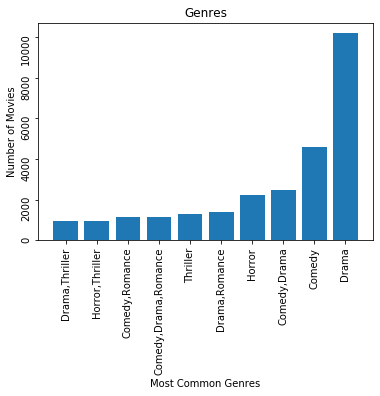

In [74]:
# Used new ascending Dataframe to create a bar graph and saved the plot.
x = mstcomgenrdf['CommonGenres']
y = mstcomgenrdf['MovieNumbers']

fig, ax = plt.subplots()
ax.bar(x,y);
ax.set_xlabel('Most Common Genres')
ax.set_ylabel('Number of Movies')
ax.set_title('Genres')
plt.autoscale()
for ax in fig.axes:
    ax.tick_params(labelrotation=90)

plt.savefig('Images/GenresByMovieCount.png')

#### Given these are the highest average rating and Microsoft is looking for the genres that would be most popular at the box office, which of these tropes have the highest mean viewer rating?

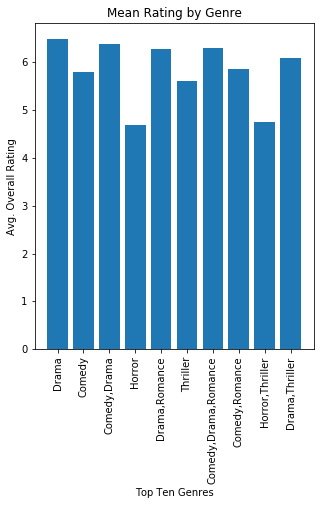

In [78]:
# Created a plot comparing the major genres and the mean average rating and saved it
x = ['Drama', 'Comedy', 'Comedy,Drama', 'Horror', 'Drama,Romance', 'Thriller', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Horror,Thriller', 'Drama,Thriller']
y = []
for genre in x:
    y.append(imdbdatadf[imdbdatadf['genres']==(genre)]['averagerating'].mean())  

fig, ax = plt.subplots(figsize = (5,6))
plt.xlabel('Top Ten Genres')
plt.ylabel('Avg. Overall Rating')
plt.title('Mean Rating by Genre')
plt.xticks(rotation= 90)
ax.bar(x,y);
plt.savefig('Images/MeanRatingGenre.png')

####  Which of these types of film would earn the most money at the box office and therefore be the best earner for Microsoft?

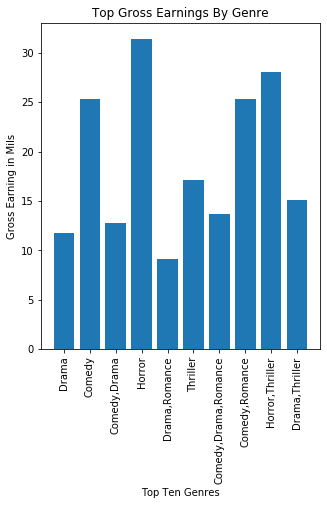

In [84]:
x = ['Drama', 'Comedy', 'Comedy,Drama', 'Horror', 'Drama,Romance', 'Thriller', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Horror,Thriller', 'Drama,Thriller']
y = []

for genre in x:
    y.append(bomimdbdf[bomimdbdf['genres']==(genre)]['domestic_gross'].mean()/1000000)

fig, ax = plt.subplots( figsize = (5, 6))
plt.xticks(rotation = 90)
ax.set_xlabel('Top Ten Genres')
ax.set_ylabel('Gross Earning in Mils')
ax.set_title('Top Gross Earnings By Genre')
ax.bar(x,y);

plt.savefig('Images/DomesticGrossEarnings.png')

#### If the best earners are not the movies that get the best rating which genres have a great enough overlap between the two categories to recomend them to Microsoft?

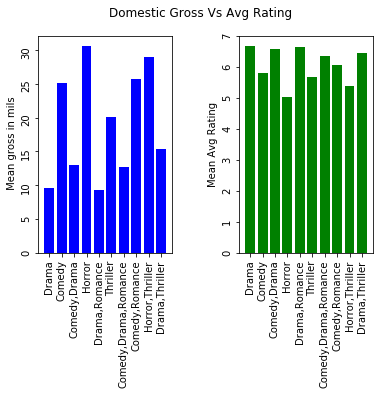

In [88]:
x = ['Drama', 'Comedy', 'Comedy,Drama', 'Horror', 'Drama,Romance', 'Thriller', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Horror,Thriller', 'Drama,Thriller']
y1 = []
for genre in x:
    y1.append(alldata[alldata['genres']==(genre)]['domestic_gross'].mean()/1000000)

y2=[]
for genre in x:
    y2.append(alldata[alldata['genres']==(genre)]['averagerating'].mean())

fig, ax = plt.subplots(1,2)

ax[0].bar(x, y1, color = 'blue')
ax[0].set_ylabel(' Mean gross in mils')

ax[1].bar(x, y2, color = 'green')
ax[1].set_ylabel('Mean Avg Rating')


for ax in fig.axes:
    ax.tick_params(labelrotation=90)

plt.suptitle('Domestic Gross Vs Avg Rating')    
plt.subplots_adjust(wspace = .5)
# plt.savefig('Images/GrossVsRating.png')

# Conclusions

Based on the comparison between the mean average rating and the average gross box offfice earnings by the ten types of film the best films that Microsofts new studio could make are comedies like Bill and Ted Face the Music or romantic comedies like Stranger than fiction.

# Next Steps

Since the recomendation for the best movies ignores the movies that are not the highest earners and the best rated of the types of movie investigated, it may be in the best interest of the customer to branch out and invest in thrillers like 23 Bridges or Horror movies like IT after they get a foothold in the market.